In [163]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

torch.manual_seed(0)

In [164]:
file_path = 'waterQuality1.csv'
# Load the dataset
df = pd.read_csv(file_path)

# Handle missing values
df.replace('#NUM!', np.nan, inplace=True)
df.dropna(inplace=True)

print(df.columns)
df


Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


### Como el dataset ya viene listo para trabajar, no tienen que se preocupar con muchos detalles, solo normalizar los valores

Así que prosigamos a normalizar los datos

In [165]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

labelencoder = LabelEncoder()
scaler = StandardScaler()
# your code here
for col in df.columns.tolist():
    if col != 'is_safe':
        df[col] = scaler.fit_transform(df[[col]])

print(f'Total predictors: {len(df.columns) - 1}')
df.head()



Total predictors: 20


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.777403,-0.585491,-0.480875,1.054205,-0.993241,-0.711941,2.152993,-0.973050,-1.657446,-0.363345,...,-0.781070,1.129767,-0.348629,0.609178,1.203362,1.661842,1.053694,1.338736,-0.917040,1
1,1.306945,0.775118,-0.599632,1.432447,-1.131948,1.208552,1.598765,-0.223303,0.294799,1.002460,...,0.009785,-1.409197,1.046960,-0.739005,0.892977,0.124811,1.053694,0.851134,0.198023,1
2,0.271572,-0.029083,-0.480875,-0.812340,-0.965499,0.803417,1.044536,-1.202564,0.501507,-0.818614,...,-0.368450,0.783298,-0.383518,0.272132,1.911763,1.786699,0.706129,2.035310,-1.288728,0
3,0.548198,-0.332067,-0.480875,1.144654,-1.159690,1.968179,-0.802892,1.306793,0.708215,1.184567,...,-1.434385,-1.517469,-0.069511,-0.401960,-0.415275,-0.516695,-1.031700,2.104968,0.198023,1
4,0.200439,1.132165,-0.520460,-1.124801,-1.020982,0.191820,1.635713,-0.361012,-0.371261,-0.575804,...,0.302058,-0.555658,-0.383518,-0.739005,0.024578,-0.219622,-1.031700,-0.611672,-0.917040,1


Aca definimos nuestro modelo, no es necesario que tenga esa exacta configuración de capas y neuronas de la solución, incluso hay varias configuraciones distintas, algunas con más neuronas y más capas e otras con menos, todas llegan al 7 si hechas a conciencia.

In [275]:
import torch.nn as nn
import torch.nn.functional as F

class PotableWaterClassification(nn.Module):
    def __init__(self):
        super().__init__()
        # your code here
        
        self.fc1 = nn.Linear(20, 128)
        self.bn1 = nn.BatchNorm1d(128)

        self.fc2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)

        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)

        self.fc4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)

        self.fc5 = nn.Linear(64, 2)

        self.dropout = nn.Dropout(0.4)

    def forward(self, x):
        # your code here
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.dropout(x)

        x = F.relu(self.fc2(x))
        x = self.bn2(x)
        x = self.dropout(x)

        x = F.relu(self.fc3(x))
        x = self.bn3(x)
        x = self.dropout(x)

        x = F.relu(self.fc4(x))
        x = self.bn4(x)
        x = self.dropout(x)

        x = self.fc5(x)
        return x

In [276]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch

### NO CAMBIAR
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce')
df.dropna(subset=['is_safe'], inplace=True)
df['is_safe'] = df['is_safe'].astype(int)
### FIM NO CAMBIAR

# Caracteristicas del entrenamiento y 'objetivo a clasificar'

# Esta función retorna 2 elementos, 1 vector de torch con las caracteristicas de entrenamiento y uno con el valor de verdad.

#tip dtype=torch.long para el vector y
def define_features_to_train_and_target(df):
    # your code here

    # Definimos el target y los predictores
    target = 'is_safe'
    columns = df.columns.tolist()
    columns.remove(target)
    
    train_df = df[columns]
    target_df = df[target]

    X = torch.tensor(train_df.values, dtype=torch.float32)
    y = torch.tensor(target_df.values, dtype=torch.long)

    return X, y
X, y = define_features_to_train_and_target(df)

In [277]:
from torch.utils.data import DataLoader, TensorDataset


## Pueden modificar, pero no recomiendo.

indices = torch.randperm(len(X))

X = X[indices]
y = y[indices]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=41)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False) 

## Instrucciones importantes. 
- Para que el código que hice funcione correctamente es necesario que usen los nombres de convenciones que hemos estado utilizando.

- Nombre de modelo: model
- Nombre de la función de perdida: criterion
- Nombre del optimizador("método de gradiente"): optimizer

- Para obtener puntaje total su arquitectura debe tener al menos 1 capa de batch normalization y una o más capas de droupout
- Como el Curso es Aprendizaje profundo, es necesario que la arquitectura tenga 2 o más capas ocultas (FC layers)
- Usar capas de BatchNorm y Dropout y no importar de torch.nn.functional

In [288]:
model = PotableWaterClassification()

train_losses = []
val_losses = []

In [289]:
import torch
from torch.optim import SGD, Adam
from torch.optim.lr_scheduler import StepLR

#Definir optimizer, criterion
# Sugerencia usar Adam
# your code here

lr = 0.001
weight_decay = 0.0000001
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
epochs = 50

# Recomendación, hagan prints, es importante ver como el modelo va aprendendo, tambien ocupen las listas train y val losses
# para ir guardando los valores y poder visualizar en el grafo luego abajo
# your code here
for epoch in range(epochs):
    for i, (batch_X, batch_y) in enumerate(train_loader):
        # Reiniciamos los gradientes a 0
        optimizer.zero_grad()

        # Generamos los outputs y aplicamos softmax para transformarlos a probabilidad
        outputs = model(batch_X)

        # Calculamos la función de pérdida
        loss = criterion(outputs, batch_y)

        # Hacemos backpropagation
        loss.backward()

        # Actualizamos los pesos y guardamos el error
        optimizer.step()
        train_losses.append(loss.item())

    if epoch % 5 == 0:
        print(f"Epoch {epoch}, Loss activacion: {loss.item()} ")

Epoch 0, Loss activacion: 0.4692520797252655 
Epoch 5, Loss activacion: 0.22383856773376465 
Epoch 10, Loss activacion: 0.1397477239370346 
Epoch 15, Loss activacion: 0.303311288356781 
Epoch 20, Loss activacion: 0.09813282638788223 
Epoch 25, Loss activacion: 0.0742509737610817 
Epoch 30, Loss activacion: 0.21713145077228546 
Epoch 35, Loss activacion: 0.09737851470708847 
Epoch 40, Loss activacion: 0.08450920134782791 
Epoch 45, Loss activacion: 0.42884087562561035 


## Las celdas de abajo son celdas de testeo, ejecutar todas para obtener feedback de tu nota

In [ ]:
#Ejecute-me

In [ ]:
#Ejecute-me

In [ ]:
#Ejecute-me

In [ ]:
#Ejecute-me

In [ ]:
#Ejecute-me

In [ ]:
#Ejecute-me

In [290]:
model.eval()  # Set the model to evaluation mode
total_val_loss = 0
predicted_classes = torch.empty(size=(0,), dtype=torch.int32)

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        outputs = model(batch_X)

        probabilities = F.softmax(outputs, dim=1)
        
        # Get the predicted class
        _, predicted_class = torch.max(probabilities, 1)
        predicted_classes = torch.cat((predicted_classes, predicted_class), 0)

        # Compute loss
        loss = criterion(outputs, batch_y)

        # Accumulate loss
        val_losses.append(loss.item())
        total_val_loss += loss.item()


correct = (predicted_classes == y_val).sum().item()
total = y_val.size(0)
accuracy = correct / total
print(f'Accuracy: {accuracy * 100}%')
average_val_loss = total_val_loss / len(val_loader)
print(f"Validation Loss: {average_val_loss}")

Accuracy: 96.375%
Validation Loss: 0.09476153552532196


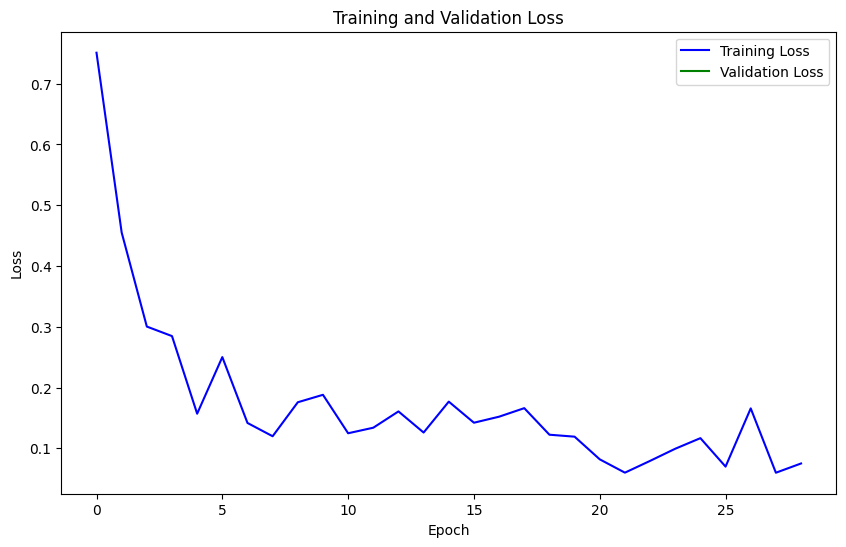

In [291]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot the training and validation loss
plt.plot(train_losses[::100], label='Training Loss', color='blue')
plt.plot(val_losses[::10], label='Validation Loss', color='green')
# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
# Add a legend
plt.legend()

# Show the plot
plt.show()